
COM4 - Prolific USB-to-Serial Comm Port (COM4)

Enter port to be used: COM4
7
:WFMPRE:YOFF 0.0E0
:WFMPRE:YMULT 2.0E-1
:WFMPRE:XINCR 1.0E-5


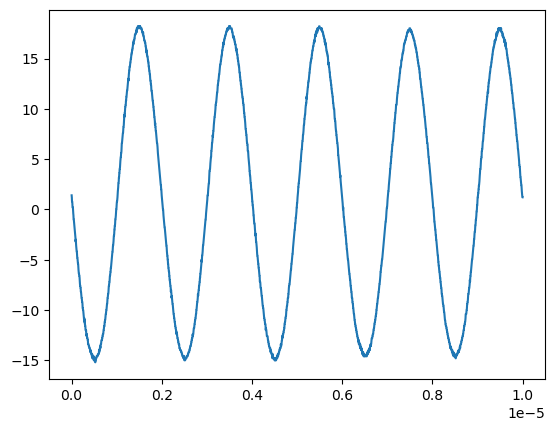

In [4]:
# import the relevant packages
import serial
import serial.tools.list_ports as port_lists
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
# Examine all the serial port hardware connected to the computer
ports=list(port_lists.comports())
# print out the names of the various ports
print()
for p in ports:
    print(p)
print()
# pick the relevant port
port_string=input('Enter port to be used: ')
# define the relevant serial port parameters and take control of the port
serial_connection=serial.Serial(port=port_string,baudrate=9600,timeout=2,
bytesize=serial.EIGHTBITS,parity=serial.PARITY_NONE,stopbits=serial.STOPBITS_ONE,
xonxoff=0,dsrdtr=0,rtscts=0)
 # write a string to the port
write_check=serial_connection.write("CURve?\r".encode()) 
print(write_check)
# read the string from the port
ID_value=serial_connection.readline()
#print(ID_value.decode())
ID_value_string=ID_value.decode()

write_check=serial_connection.write("wfmpre:yoff?\r".encode()) 
vertical_offset=serial_connection.readline().decode()
print(vertical_offset)

write_check=serial_connection.write("wfmpre:ymult?\r".encode()) 
vertical_scale_factor_str=serial_connection.readline().decode()
vertical_scale_factor = vertical_scale_factor_str.split("\r")[0]
print(vertical_scale_factor)
vertical_scale_factor = float(vertical_scale_factor.split(" ")[1])

voltages_str = ID_value_string.split(" ")[1]
voltages = voltages_str.split(",")
voltages = np.array(voltages, dtype=int)
voltages = np.multiply(voltages, vertical_scale_factor)

write_check=serial_connection.write("wfmpre:xincr?\r".encode()) 
x_incr=serial_connection.readline().decode()
print(x_incr)
time = np.linspace(0,1*10**-5,2500)


plt.plot(time, voltages)

# close the port
serial_connection.close()

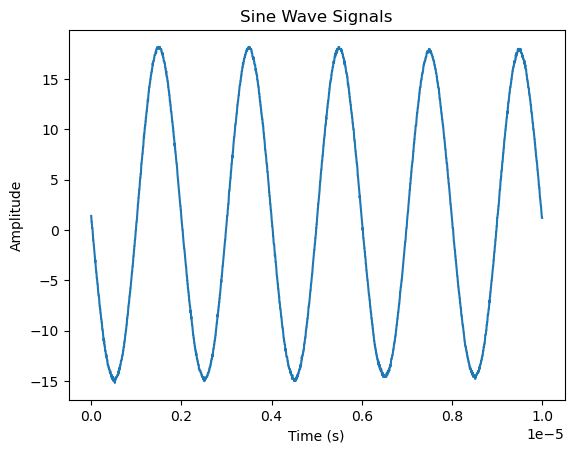

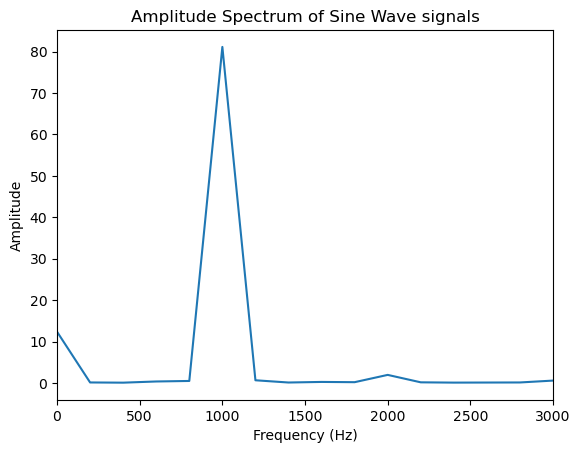

In [19]:
fs = 100000 # sampling frequency (Hz) 
ts = 1/fs # set sampling rate and interval
period=5*10**-3 #sampling period
nfft = period/ts # length of DFT
t = np.linspace(0,1*10**-5,2500)



plt.figure(1)
plt.plot(t,voltages)


H = np.fft.fft(voltages) # determine the Discrte Fourier Transform

# Take the magnitude of fft of H
mx = abs(H[0:int(nfft/2)])*(2.0/nfft)  # note only need to examien first half of spectrum
# Frequency vector
f = np.arange(0,int(nfft/2))*fs/nfft

plt.title('Sine Wave Signals');
plt.xlabel('Time (s)');
plt.ylabel('Amplitude');
plt.figure(3)
plt.plot(f,mx)
plt.title('Amplitude Spectrum of Sine Wave signals');
plt.xlabel('Frequency (Hz)');
plt.xlim(0,3000)
plt.ylabel('Amplitude');
plt.savefig('DAex6_fft.png',dpi=600)